<a href="https://colab.research.google.com/github/GitDashHero/GitDashHero/blob/main/nlp_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF Vectorizer

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
import pandas as pd

toy_corpus= ["the fat cat sat on the mat",
             "the big cat slept",
             "the dog chased a cat"]
vectorizer=TfidfVectorizer(use_idf=True)

corpus_tfidf=vectorizer.fit_transform(toy_corpus)

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df=pd.DataFrame(np.round(corpus_tfidf.toarray(),2))
df.columns=vectorizer.get_feature_names()
df

The vocabulary size is 10 
The document-term matrix shape is (3, 10)


,big,cat,chased,dog,fat,mat,on,sat,slept,the
0,0.00,0.25,0.00,0.00,0.42,0.42,0.42,0.42,0.00,0.49
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.00,0.36


## Classification

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
labels= [0,1,0]
clf =  SVC()
clf.fit(df, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [3]:
clf.predict(df)

array([0, 1, 0])

# Building a LM Model 
Once we prepared our corpus above, we are ready to start training Maximum Likelihood Estimator (MLE) as a Language Model.

## Training a bigram LM

In [4]:
!pip install nltk==3.5.0

In [5]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

nltk.download('gutenberg')
nltk.download('punkt')
macbeth = gutenberg.sents('shakespeare-macbeth.txt')

model, vocab = padded_everygram_pipeline(2, macbeth)
lm=MLE(2)
lm.fit(model,vocab)
print(list(lm.vocab)[:40])
print(f"The number of words is {len(lm.vocab)}")


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['<s>', '[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']', '</s>', 'Actus', 'Primus', '.', 'Scoena', 'Prima', 'Thunder', 'and', 'Lightning', 'Enter', 'three', 'Witches', '1', 'When', 'shall', 'we', 'meet', 'againe', '?', 'In', ',', 'or', 'in', 'Raine', '2', 'the', 'Hurley', '-', 'burley']
The number of words is 4020


In [6]:
print(macbeth[42])

['So', 'well', 'thy', 'words', 'become', 'thee', ',', 'as', 'thy', 'wounds', ',', 'They', 'smack', 'of', 'Honor', 'both', ':', 'Goe', 'get', 'him', 'Surgeons', '.']


## See what LM learned

Here is a list of what the language model learded so far

In [7]:
print(f"The frequency of the term 'Macbeth' is {lm.counts['Macbeth']}")
print(f"The language model probability score of 'Macbeth' is {lm.score('Macbeth')}")
print(f"The number of times 'Macbeth' follows 'Enter' is {lm.counts[['Enter']]['Macbeth']} ")
print(f"P(Macbeth | Enter) is {lm.score('Macbeth', ['Enter'])}")
print(f"P(shaking | for) is {lm.score('shaking', ['for'])}")

The frequency of the term 'Macbeth' is 61
The language model probability score of 'Macbeth' is 0.0022631149365585812
The number of times 'Macbeth' follows 'Enter' is 15 
P(Macbeth | Enter) is 0.1875
P(shaking | for) is 0.012195121951219513


## Language Generation with LM

To generate one word

In [8]:
lm.generate(1, random_seed=42)

'done'

To generate a sentence of 7 words length

In [9]:
print(lm.generate(7, random_seed=42))

['done', ',', 'Not', 'for', 'thee', 'in', 'this']


To generate 10 words starting with \<s>

In [10]:
 lm.generate(10, text_seed=['<s>'], random_seed=42)

['My', 'Bosome', 'franchis', "'", 's', 'of', 'time', ',', 'We', 'are']

# Word Embeddings Training

In [11]:
!pip install gensim==3.8.3

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=macbeth, size=100, window= 4, min_count=10, workers=4, iter=10)

In [13]:
model.wv.similar_by_word('then',10)

[('againe', 0.9997998476028442),
 ('an', 0.999778687953949),
 ('shall', 0.9997771978378296),
 ('when', 0.9997736215591431),
 ('or', 0.9997700452804565),
 ('not', 0.9997690916061401),
 ('can', 0.9997678995132446),
 ('now', 0.9997666478157043),
 ('(', 0.9997663497924805),
 ('had', 0.9997636079788208)]

In [14]:
model.wv['did'] # get numpy vector of word 'Macbeth'

array([ 0.11884934, -0.17134352,  0.17269616, -0.30921096, -0.12028918,
       -0.29482692,  0.24286895, -0.2730563 ,  0.05334015, -0.0344891 ,
       -0.17817347, -0.06425925,  0.17002554, -0.01621997, -0.05819555,
        0.18732274, -0.05596793,  0.10403144, -0.23141676, -0.41310465,
       -0.02281359,  0.00221922, -0.39478567,  0.19355878, -0.17570479,
        0.40032542, -0.07468601,  0.05536351, -0.11322648, -0.33377808,
       -0.13843724,  0.03018507, -0.20203067,  0.11650338, -0.30902818,
        0.4265428 , -0.0060406 ,  0.12714396, -0.04584336, -0.53600043,
       -0.0314276 ,  0.2403718 , -0.3798364 ,  0.06651637,  0.03453469,
       -0.0178309 ,  0.17141095,  0.19978614,  0.24257642, -0.08292238,
        0.093366  ,  0.09052186, -0.1471792 , -0.05284431, -0.02916657,
       -0.01923698, -0.14959316,  0.11713339,  0.03580788, -0.27161303,
        0.18637942, -0.00955149,  0.3643276 , -0.00592206, -0.24047181,
       -0.08476501, -0.04014385, -0.2998718 ,  0.13055016, -0.21

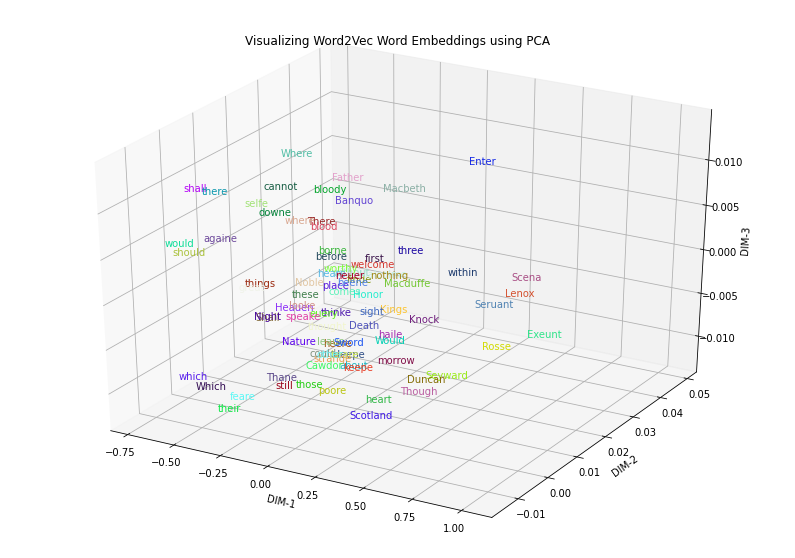

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

np.random.seed(42)
words=list([e for e in model.wv.vocab if len(e)>4]) # plot words longer than 4
random.shuffle(words)
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words[:100]])

def plotWords3D(vecs, words, title):
    """
        Parameters
        ----------
        vecs : numpy-array
            Transformed 3D array either by PCA or other techniques
        words: a list of word
            the word list to be mapped
        title: str
            The title of plot     
        """
    fig = plt.figure(figsize=(14,10))
    ax = fig.gca(projection='3d')
    for w, vec in zip(words, vecs):
        ax.text(vec[0],vec[1],vec[2], w, color=np.random.rand(3,))
    ax.set_xlim(min(vecs[:,0]), max(vecs[:,0]))
    ax.set_ylim(min(vecs[:,1]), max(vecs[:,1]))
    ax.set_zlim(min(vecs[:,2]), max(vecs[:,2]))
    ax.set_xlabel('DIM-1')
    ax.set_ylabel('DIM-2')
    ax.set_zlabel('DIM-3')
    plt.title(title)
    plt.show()
plotWords3D(words3d, words, "Visualizing Word2Vec Word Embeddings using PCA")

## FastText

In [16]:
!pip install fasttext

In [17]:
#Parameters min_n and max_n take control the lengths of character ngrams. 
#If max_n is set to 0, no character ngrams are used, and the model turns out to be Word2Vec.


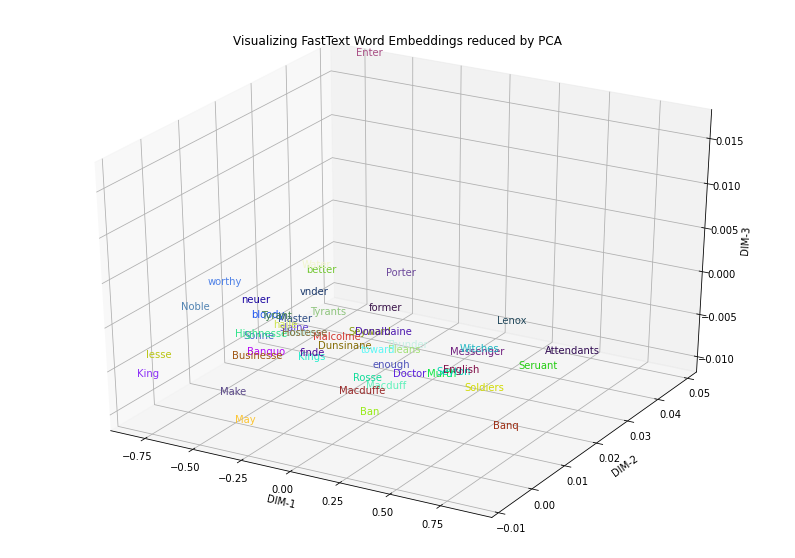

In [18]:
from gensim.models import FastText
model = FastText(sentences=macbeth, size=100, window=5, min_count=5,  workers=4, iter=10,word_ngrams=3)
#min_n: min length of char ngrams (Default 3)
#max_n: max length of char ngrams (Default 6)

np.random.seed(42)
words=[w[0] for w in model.wv.similar_by_word("Macbeth",50)]
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words])
plotWords3D(words3d, words, "Visualizing FastText Word Embeddings reduced by PCA")

In [19]:
## Glove

In [20]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

In [21]:
model.most_similar("java")

[('drupal', 0.8857486248016357),
 ('linux', 0.8667981028556824),
 ('electronic', 0.8582332134246826),
 ('adobe', 0.8580152988433838),
 ('developer', 0.8561978936195374),
 ('server', 0.8490769863128662),
 ('javascript', 0.8466134667396545),
 ('osx', 0.839451014995575),
 ('enterprise', 0.8377522826194763),
 ('software', 0.8366125226020813)]

# LSTM Training

In [22]:
import numpy as np
import tensorflow as tf

In [23]:
!wget https://dl.fbaipublicfiles.com/glue/data/SST-2.zip 
!unzip SST-2.zip

--2021-10-22 17:57:55--  https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7439277 (7.1M) [application/zip]
Saving to: ‘SST-2.zip.1’

SST-2.zip.1         100%[===================>]   7.09M  4.54MB/s    in 1.6s    

2021-10-22 17:57:58 (4.54 MB/s) - ‘SST-2.zip.1’ saved [7439277/7439277]

Archive:  SST-2.zip
replace SST-2/dev.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: SST-3.ZIP
  inflating: SST-3.ZIP               
replace SST-2/original/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: Readme2.txt
  inflating: Readme2.txt             
replace SST-2/original/SOStr.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SST-2/original/SOStr.txt  
replace SST-2/original/STree.txt? [y]es, [n]o, [A]ll, [N]one, [r

In [24]:
import pandas as pd 
df=pd.read_csv('SST-2/train.tsv',sep="\t")
sentences=df.sentence
labels=df.label

In [25]:
df.head(3)

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1


In [26]:
max_sen_len=max([len(s.split()) for s in sentences])
words = ["PAD"]+list(set([w for s in sentences for w in s.split()]))
word2idx= {w:i for i,w in enumerate(words)}
max_words=max(word2idx.values())+1
idx2word= {i:w for i,w in enumerate(words)}
# preparing training set
train=[list(map(lambda x:word2idx[x], s.split())) for s in sentences]

In [27]:
len(train), len(labels)

(67349, 67349)

In [28]:
sum(labels), len(labels), sum(labels)/ len(labels)

(37569, 67349, 0.5578256544269403)

In [29]:
from keras import preprocessing
train_pad = preprocessing.sequence.pad_sequences(train, maxlen=max_sen_len)
print('train shape:', train_pad.shape)

train shape: (67349, 52)


In [30]:
print(train_pad)

[[    0     0     0 ... 13955  9972  8925]
 [    0     0     0 ...  1780  8920  4311]
 [    0     0     0 ...  7385   350  3684]
 ...
 [    0     0     0 ...  2669  4709  9014]
 [    0     0     0 ... 12829  8001  4571]
 [    0     0     0 ... 13955   394 14454]]


In [31]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=16, validation_split=0.2)

Epoch 1/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.4359 - acc: 0.7912 - val_loss: 0.3357 - val_acc: 0.8537
Epoch 2/15
3368/3368 [==============================] - 19s 6ms/step - loss: 0.2996 - acc: 0.8747 - val_loss: 0.3067 - val_acc: 0.8728
Epoch 3/15
3368/3368 [==============================] - 18s 5ms/step - loss: 0.2608 - acc: 0.8947 - val_loss: 0.2755 - val_acc: 0.8872
Epoch 4/15
3368/3368 [==============================] - 18s 5ms/step - loss: 0.2313 - acc: 0.9092 - val_loss: 0.2589 - val_acc: 0.8964
Epoch 5/15
3368/3368 [==============================] - 19s 6ms/step - loss: 0.2101 - acc: 0.9179 - val_loss: 0.2580 - val_acc: 0.9019
Epoch 6/15
3368/3368 [==============================] - 18s 5ms/step - loss: 0.1948 - acc: 0.9241 - val_loss: 0.2472 - val_acc: 0.9068
Epoch 7/15
3368/3368 [==============================] - 18s 5ms/step - loss: 0.1823 - acc: 0.9295 - val_loss: 0.2338 - val_acc: 0.9089
Epoch 8/15
3368/3368 [==============================] -

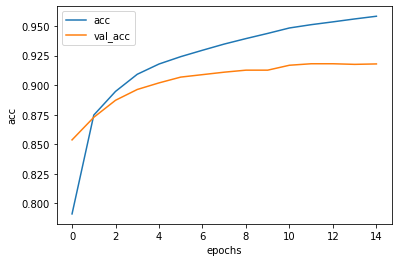

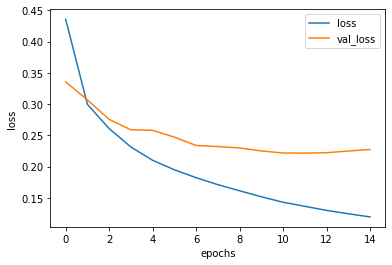

In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [33]:
from keras import layers
model = Sequential()
model.add(layers.Embedding(max_words, 32, input_length=max_sen_len))
model.add(layers.Conv1D(32, 8, activation='relu'))
model.add(layers.MaxPooling1D(4))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 32)            474144    
_________________________________________________________________
conv1d (Conv1D)              (None, 45, 32)            8224      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 32)             3104      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 485,505
Trainable params: 485,505
Non-trainable params: 0
________________________________________________

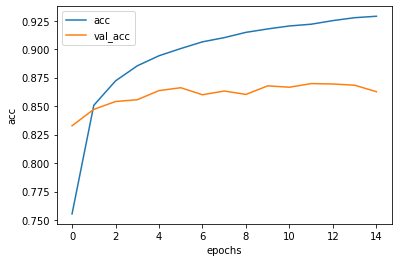

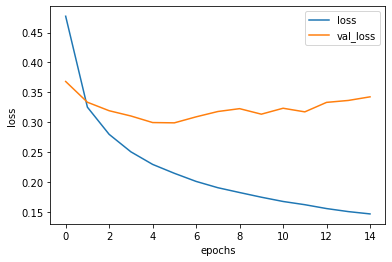

In [34]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

# Text Clustering with Sentence-BERT

In [1]:
!pip3 install sentence-transformers

     |████████████████████████████████| 78 kB 3.7 MB/s 
     |████████████████████████████████| 2.9 MB 17.3 MB/s 
     |████████████████████████████████| 3.3 MB 55.0 MB/s 
     |████████████████████████████████| 1.2 MB 55.8 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 596 kB 52.0 MB/s 
     |████████████████████████████████| 895 kB 59.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=a9921cdc57a0b8a5b989cee3fa91b22491eada7d8056c0e8f636bad88377e2a9
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install datasets

     |████████████████████████████████| 290 kB 7.5 MB/s 
     |████████████████████████████████| 243 kB 45.9 MB/s 
     |████████████████████████████████| 125 kB 75.9 MB/s 
     |████████████████████████████████| 1.3 MB 58.5 MB/s 
     |████████████████████████████████| 160 kB 70.0 MB/s 
     |████████████████████████████████| 271 kB 62.4 MB/s 


In [5]:
import pandas as pd, numpy as np
import torch, os
from datasets import load_dataset

In [6]:
dataset = load_dataset("amazon_polarity",split="train")

Reusing dataset amazon_polarity (/root/.cache/huggingface/datasets/amazon_polarity/amazon_polarity/3.0.0/ac31acedf6cda6bc2aa50d448f48bbad69a3dd8efc607d2ff1a9e65c2476b4c1)


In [7]:
dataset

Dataset({
    features: ['label', 'title', 'content'],
    num_rows: 3600000
})

In [8]:
corpus=dataset.shuffle(seed=42)[:10000]['content']

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/amazon_polarity/amazon_polarity/3.0.0/ac31acedf6cda6bc2aa50d448f48bbad69a3dd8efc607d2ff1a9e65c2476b4c1/cache-32f8db943837ee14.arrow


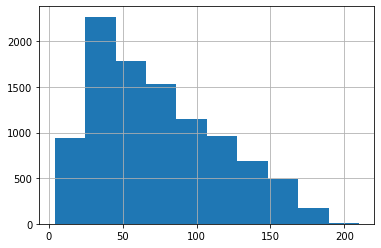

In [7]:
pd.Series([len(e.split()) for e in corpus]).hist()

## Model Selection
(source link: https://www.sbert.net/docs/pretrained_models.html)
The best available models for STS are:

* stsb-mpnet-base-v2
* stsb-roberta-base-v2
* stsb-distilroberta-base-v2
* nli-mpnet-base-v2
* nli-roberta-base-v2 
* nli-distilroberta-base-v2

Paraphrase Identification Models
* paraphrase-distilroberta-base-v1 - Trained on large scale paraphrase data.
* paraphrase-xlm-r-multilingual-v1 - Multilingual version of paraphrase-distilroberta-base-v1, trained on parallel data for 50+ languages. (Teacher: paraphrase-distilroberta-base-v1, Student: xlm-r-base)

In [8]:
from sentence_transformers import SentenceTransformer
model_path="paraphrase-distilroberta-base-v1"
#paraphrase-distilroberta-base-v1 - Trained on large scale paraphrase data.
model = SentenceTransformer(model_path)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
corpus_embeddings = model.encode(corpus)
corpus_embeddings.shape

(10000, 768)

In [10]:
from sklearn.cluster import KMeans
K=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(corpus_embeddings)

In [11]:
import pandas as pd
cls_dist=pd.Series(kmeans.labels_).value_counts()
cls_dist

3    2772
4    2089
0    1911
2    1883
1    1345
dtype: int64

In [12]:
import scipy
distances = scipy.spatial.distance.cdist(kmeans.cluster_centers_ , corpus_embeddings)

In [13]:
centers={}
print("Cluster", "Size", "Center-idx", "Center-Example", sep="\t\t")
for i,d in enumerate(distances):
  ind = np.argsort(d, axis=0)[0]
  centers[i]=ind
  print(i,cls_dist[i], ind, corpus[ind] ,sep="\t\t")

Cluster		Size		Center-idx		Center-Example
0		1911		5536		The sound quality is not good. I used it once and couldn't take the poor audio. I bought this because the cheaper one I bought previously had poor sound quality, but this more expensive one is no better. Save your money for a radio that comes outfitted with the proper connectors.
1		1345		3900		This album like many rock/emo albums is good, but there is nothing innovative about it, some very catchy tunes, good singing, nice rhythm. Awesome to listen to. Worth the buy.
2		1883		204		This DVD looks nice and all but is horrible because it skips and stuff after the first time I watched it. Thumbs down.
3		2772		1761		I read this book a while back and thought it was very interesting. It's a good book to read if your tired of just reading love stories all the time.
4		2089		1474		The quality of this product is great, easy to clean and fits my sink perfectly.However, I think it is a little bit expensive.


## Visualization of the cluster points

In [14]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 22.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=dd46f45c6fa3855440e8d55b748ed991533c6b28824125b3911496b7646ce33c
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=e2266b707c535bc06064dfe5c07294a9e404ed8b041c21ba6d8dbcc96f514853
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


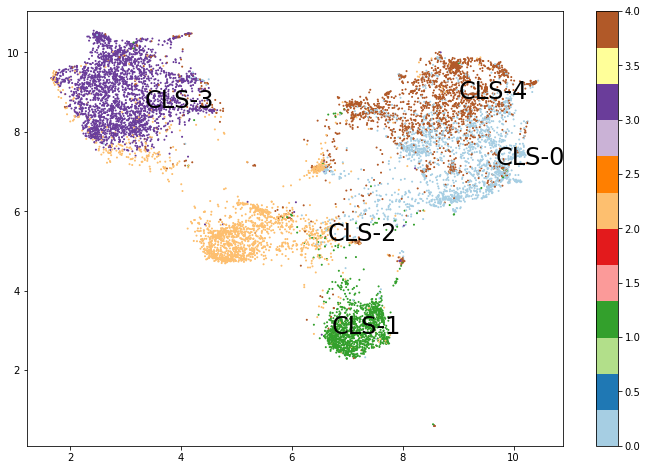

In [15]:
import matplotlib.pyplot as plt
import umap
X = umap.UMAP(n_components=2, min_dist=0.0).fit_transform(corpus_embeddings)
labels= kmeans.labels_

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=labels, s=1, cmap='Paired')
for c in centers:
  plt.text(X[centers[c],0], X[centers[c], 1], "CLS-"+ str(c), fontsize=24) 
plt.colorbar()

## Topic Modeling with BERT

BERTopic Official NOTE: BERTopic is stocastich which means that the topics might differ across runs. This is mostly due to the stocastisch nature of UMAP.

In [2]:
!pip install bertopic

Official Note: Restart the Notebook
After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

In [9]:
len(corpus)

10000

In [10]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("paraphrase-distilroberta-base-v1")
topic_model = BERTopic(embedding_model=sentence_model)
topics, _ = topic_model.fit_transform(corpus)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [11]:
topic_model.get_topic_info()[:6]

,Topic,Count,Name
0,0,5253,0_to_this_of_my
1,1,3097,1_book_this_read_you
2,2,1313,2_of_cd_album_you
3,3,231,3_game_you_of_games
4,4,88,4_for_not_my_if
5,5,18,5_que_es_los_del


In [12]:
topic_model.get_topic(2)

[('of', 0.04852170757116534),
 ('cd', 0.042107781578672725),
 ('album', 0.04083414221362128),
 ('you', 0.03366234766201436),
 ('music', 0.028989525031759944),
 ('songs', 0.027822194647678874),
 ('but', 0.024545109566550143),
 ('song', 0.021861632208241468),
 ('one', 0.01930431945279591),
 ('not', 0.01781855577932398)]